<a href="https://colab.research.google.com/github/mkirby1995/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [1]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [2]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [3]:
# And a new friend - t
t1 = stats.t(30)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.0350983390135313
1.0714285714285714


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [4]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [5]:
lambda_heights = [72, 72, 77, 72, 73, 67, 64, 58, 63, 78]

import pandas as pd 

df = pd.DataFrame({'heights': lambda_heights})
df.head(10)

,heights
0,72
1,72
2,77
3,72
4,73
5,67
6,64
7,58
8,63
9,78


In [6]:
df.heights.mean()

69.6

In [0]:
import random

random.seed(10)

In [8]:
population=[]

for _ in range(1000):
  population.append(random.randint(0,1))
  
  
population[:20]

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]

In [9]:
sample = random.sample(population,100)

print(sample)

[0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]


In [0]:
import numpy as np
import math


def mean(sample):
  return sum(sample) / len(sample)

def variance(s):
  return sum((s - mean(s))**2) / (len(s) - 1)

def stdev(list):
  return math.sqrt(variance(list))

def t_test(sample, pop):
  x_bar = mean(sample)
  null = mean(pop)
  stdev = math.sqrt(variance(sample))
  number_of_observations = len(sample)
  return (x_bar - null) / (stdev / math.sqrt(number_of_observations))

In [0]:
variance(df['likes_coke']), stdev(df['likes_coke'])

In [0]:
df = pd.DataFrame({'likes_coke': sample})

In [0]:
df.likes_coke.mean()

In [0]:
mean(df.likes_coke)

In [0]:
df.plot.hist();

In [0]:
scipy.stats.ttest_1samp(df['likes_coke'], mean(population))

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
column_names = ['Class Name',
                'handicapped-infants',
                'water-project-cost-sharing',
                'adoption-of-the-budget-resolution',
                'physician-fee-freeze',
                'el-salvador-aid',
                'religious-groups-in-schools',
                'anti-satellite-test-ban',
                'aid-to-nicaraguan-contras',
                'mx-missile',
                'immigration',
                'synfuels-corporation-cutback',
                'education-spending',
                'superfund-right-to-sue',
                'crime',
                'duty-free-exports',
                'export-administration-act-south-africa']

In [0]:
votes = pd.DataFrame(pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names = column_names))

In [15]:
votes.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
votes = votes.replace({'y': 1, 'n': 0, '?': np.NaN})

In [17]:
votes.isna().sum()

Class Name                                  0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64

In [18]:
votes['Class Name'].value_counts()

democrat      267
republican    168
Name: Class Name, dtype: int64

In [0]:
votes = votes.sort_values(by='Class Name')

In [0]:
democrats = votes.head(267)
republicans = votes.tail(168)

In [21]:
democrats.describe().T['mean']

handicapped-infants                       0.604651
water-project-cost-sharing                0.502092
adoption-of-the-budget-resolution         0.888462
physician-fee-freeze                      0.054054
el-salvador-aid                           0.215686
religious-groups-in-schools               0.476744
anti-satellite-test-ban                   0.772201
aid-to-nicaraguan-contras                 0.828897
mx-missile                                0.758065
immigration                               0.471483
synfuels-corporation-cutback              0.505882
education-spending                        0.144578
superfund-right-to-sue                    0.289683
crime                                     0.350195
duty-free-exports                         0.637450
export-administration-act-south-africa    0.935135
Name: mean, dtype: float64

In [22]:
republicans.describe().T['mean']

handicapped-infants                       0.187879
water-project-cost-sharing                0.506757
adoption-of-the-budget-resolution         0.134146
physician-fee-freeze                      0.987879
el-salvador-aid                           0.951515
religious-groups-in-schools               0.897590
anti-satellite-test-ban                   0.240741
aid-to-nicaraguan-contras                 0.152866
mx-missile                                0.115152
immigration                               0.557576
synfuels-corporation-cutback              0.132075
education-spending                        0.870968
superfund-right-to-sue                    0.860759
crime                                     0.981366
duty-free-exports                         0.089744
export-administration-act-south-africa    0.657534
Name: mean, dtype: float64

Lets look at the following for democratic support

- adoption-of-the-budget-resolution
- aid-to-nicaraguan-contras
- export-administration-act-south-africa

And these for republican support

- physician-fee-freeze
- education-spending

In [0]:
# List of samples
sample_list = []
for _ in votes.columns[1:17]:
  sample_list.append(votes[_].sample(30))

# List of Columns
columns = ['handicapped-infants',
            'water-project-cost-sharing',
            'adoption-of-the-budget-resolution',
            'physician-fee-freeze',
            'el-salvador-aid',
            'religious-groups-in-schools',
            'anti-satellite-test-ban',
            'aid-to-nicaraguan-contras',
            'mx-missile',
            'immigration',
            'synfuels-corporation-cutback',
            'education-spending',
            'superfund-right-to-sue',
            'crime',
            'duty-free-exports',
            'export-administration-act-south-africa']

In [0]:
import scipy
import scipy.stats

def double_t_test(issue):

  """This is a two-sided test for the null hypothesis that 2 independent
     samples have identical average values"""
  
  # Test function from scipy
  two_sided_test = scipy.stats.ttest_ind

  # Sample A: Dems
  Dems = democrats[issue]

  # Sample B: Repubs
  Repubs = republicans[issue]

  # Run T test
  stat = two_sided_test(Dems, Repubs, nan_policy='omit')
  
  return stat

In [25]:
print(double_t_test('adoption-of-the-budget-resolution'))

Ttest_indResult(statistic=23.21277691701378, pvalue=2.0703402795404463e-77)


In [26]:
results = []
for _ in range(16):
  print(columns[_],'.....\t.....', double_t_test(columns[_]),'\n')
  results.append(double_t_test(columns[_])[0])

handicapped-infants .....	..... Ttest_indResult(statistic=9.205264294809222, pvalue=1.613440327937243e-18) 

water-project-cost-sharing .....	..... Ttest_indResult(statistic=-0.08896538137868286, pvalue=0.9291556823993485) 

adoption-of-the-budget-resolution .....	..... Ttest_indResult(statistic=23.21277691701378, pvalue=2.0703402795404463e-77) 

physician-fee-freeze .....	..... Ttest_indResult(statistic=-49.36708157301406, pvalue=1.994262314074344e-177) 

el-salvador-aid .....	..... Ttest_indResult(statistic=-21.13669261173219, pvalue=5.600520111729011e-68) 

religious-groups-in-schools .....	..... Ttest_indResult(statistic=-9.737575825219457, pvalue=2.3936722520597287e-20) 

anti-satellite-test-ban .....	..... Ttest_indResult(statistic=12.526187929077842, pvalue=8.521033017443867e-31) 

aid-to-nicaraguan-contras .....	..... Ttest_indResult(statistic=18.052093200819733, pvalue=2.82471841372357e-54) 

mx-missile .....	..... Ttest_indResult(statistic=16.437503268542994, pvalue=5.0307926

In [27]:
results

[9.205264294809222,
 -0.08896538137868286,
 23.21277691701378,
 -49.36708157301406,
 -21.13669261173219,
 -9.737575825219457,
 12.526187929077842,
 18.052093200819733,
 16.437503268542994,
 -1.7359117329695164,
 8.293603989407588,
 -20.500685724563073,
 -13.51064251060933,
 -16.342085656197696,
 12.853146132542978,
 6.849454815841208]

In [0]:
Repub = []
Dems = []

for i in (results):
  if i >=0:
    Dems.append(i)
  else:
    Dems.append(0)
    
    
for i in (results):
  if i < 0:
    Repub.append(i)
  else:
    Repub.append(0)

In [29]:
Dems

[9.205264294809222,
 0,
 23.21277691701378,
 0,
 0,
 0,
 12.526187929077842,
 18.052093200819733,
 16.437503268542994,
 0,
 8.293603989407588,
 0,
 0,
 0,
 12.853146132542978,
 6.849454815841208]

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 19, 10

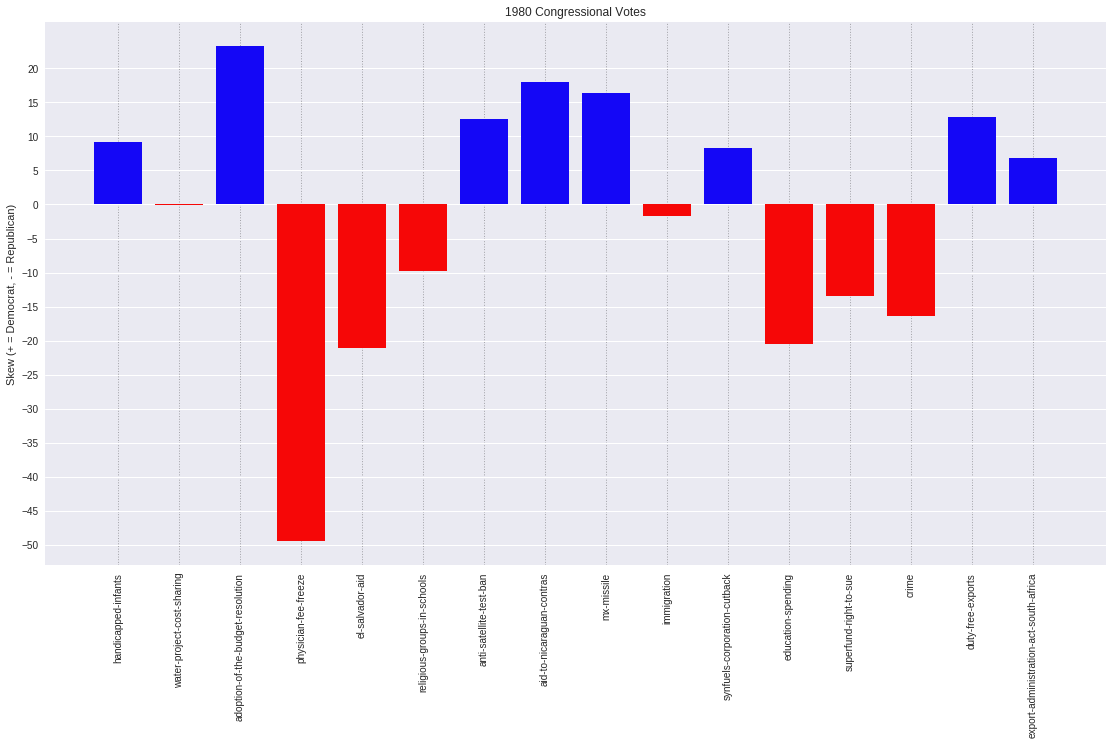

In [37]:
N = 16
import matplotlib.pyplot as plt

# the x locations for the groups
ind = np.arange(N)
# the width of the bars: can also be len(x) sequence
width = 0.8      

# Bars for surplus
p1 = plt.bar(columns, Repub, width, color='#F60707')

# Bars for deficit
p2 = plt.bar(columns, Dems, width, color ='#1407F6')

plt.ylabel('Skew (+ = Democrat, - = Republican)')
plt.title('1980 Congressional Votes')
plt.xticks(columns, rotation=90)
plt.yticks(np.arange(-50, 25, 5))
plt.grid(b=True, which='major', axis='x',color='black', linestyle=':', linewidth=1, alpha=.3)
plt.show()

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars